In [1]:
# Define classes
class User:
    def __init__(self, name, connection, post_viewed, post_created, comments):
        self.name = name                 # Name of the user
        self.connection = connection     # Other users the user is connected with and their relationship
        self.post_viewed = post_viewed   # Posts that the user has seen and how many times they've seen it
        self.post_created = post_created # Posts that the user has made
        self.comments = comments         # Comments that the user has made 

class Post:
    def __init__(self, author, date, users, content, title):
        self.author = author   # Author of the post (user)
        self.date = date       # Date when the post was created
        self.users = users     # List of users that have seen this post
        self.content = content # Content of the post (string)
        self.title = title     # Title of the post that will show on the graph

class Comment:
    def __init__(self, author, post, date, content):
        self.author = author   # Author of the post
        self.post = post       # Post that the comment is tied to
        self.date = date       # Date when the post was created
        self.content = content # Content of the comment (string)

In [2]:
# Create random users
list_of_users = [
    User("UserA", 
         {"UserB": "co-worker"}, 
         {"PostA": 1, "PostB": 2, "PostC": 3, "PostD": 1}, 
         ["PostA", "PostB"], 
         ["CommentA", "CommentB"]),
    User("UserB", 
         {"UserA": "follows", "UserC": "blocked",}, 
         {"PostA": 5, "PostC": 2, "PostD": 2}, 
         ["PostA", "PostC", "PostD"], 
         ["CommentC", "CommentD", "CommentE", "CommentF"]),
    User("UserC", 
         {"UserA": "follows", "UserB": "friends"}, 
         {"PostA": 3, "PostB": 1, "PostC": 7, "PostE": 1}, 
         ["PostA", "PostB", "PostC", "PostE"], 
         ["CommentG", "CommentH", "CommentI", "CommentJ", "CommentK", "CommentL"]),
]
# Create random posts
list_of_posts = [
    Post("UserA", "08/02/23", ["UserA", "UserB", "UserC"], "ContentA", "PostA"),
    Post("UserA", "08/04/22", ["UserA", "UserC"], "ContentB", "PostB"),
    Post("UserB", "08/01/23", ["UserA", "UserB", "UserC"], "ContentC", "PostC"),
    Post("UserB", "08/07/24", ["UserA", "UserB"], "ContentD", "PostD"),
    Post("UserC", "09/12/21", ["UserC"], "ContentE", "PostE"),
]

# Create random comments
list_of_comments = [
    Comment("UserA", "PostA", "10/21/25", "CommentA"),
    Comment("UserA", "PostA", "10/21/25", "CommentB"),
    Comment("UserB", "PostB", "09/21/22", "CommentC"),
    Comment("UserB", "PostC", "11/07/21", "CommentD"),
    Comment("UserB", "PostD", "12/14/22", "CommentE"),
    Comment("UserB", "PostE", "11/11/21", "CommentF"),
    Comment("UserC", "PostE", "12//25", "CommentG"),
    Comment("UserC", "PostE", "10/31/22", "CommentH"),
    Comment("UserC", "PostE", "07/17/21", "CommentI"),
    Comment("UserC", "PostE", "04/08/20", "CommentJ"),
    Comment("UserC", "PostE", "02/04/20", "CommentK"),
    Comment("UserC", "PostE", "01/27/20", "CommentL"),
]

In [ ]:
import networkx as nx
import matplotlib as plt

network_graph = nx.MultiDiGraph()

# Add all the different nodes into the graph 
# O(V + E)
for user in list_of_users: 
    # Add users to the graph
    network_graph.add_node(user.name)
    # Make the users light blue
    network_graph.nodes[user.name]["color"] = "lightblue"
    # Add edges from user to other users
    for connection in user.connection:
        network_graph.add_edge(user.name, connection, weight=user.connection[connection])
    # Add edges from user to posts they've made
    for post in user.post_viewed:
        network_graph.add_edge(user.name, post, weight=user.post_viewed[post])
    # Add edges from user to comments they've made
    for comment in user.comments:
        network_graph.add_edge(user.name, comment, weight="Created")

for post in list_of_posts: 
    # Add posts to the graph
    network_graph.add_node(post.title)
    # Make the posts light green
    network_graph.nodes[post.title]["color"] = "lightgreen"

for comment in list_of_comments: 
    # Add comments to the graph
    network_graph.add_node(comment.content)
    # Make the comments red
    network_graph.nodes[comment.content]["color"] = "red"
    # Add edges from comments to the posts they're tied to
    network_graph.add_edge(comment.post, comment.content, weight="source")

In [4]:
from collections import Counter

# Algorithm
# Get a list of all the edges in the graph
edges = network_graph.edges(data=True)
# Find the important post by comments
# Create a dictionary that contains the post and the total number of comments it has
sum_of_comments = {}
# Add to / update the dictionary
for edge in edges:
    if edge[0].startswith("Post"): # Out-edge for post nodes
        sum_of_comments[edge[0]] = sum_of_comments.get(edge[0], 0) + 1
# Change the color of the post with the most comments to orange
network_graph.nodes[max(sum_of_comments, key=sum_of_comments.get)]["color"] = "orange" 

# Find the important post by views
# Create a dictionary that contains the post and the total number of views it has
sum_of_views = {}
# Add to / update the dictionary 
for edge in edges:
    if edge[1].startswith("Post"): # In-edge for post nodes
        sum_of_views[edge[1]] = sum_of_views.get(edge[1], 0) + edge[2]['weight']
# Change the color of the post with the most views to magenta
network_graph.nodes[max(sum_of_views, key=sum_of_views.get)]["color"] = "magenta" 

# Find the important post by views or comments
importance_of_comments = 0.5 # Change variable to decide importance (must by in range [0,1])
importance_of_views = 1 - importance_of_comments
# Change the values in both dictionary by their importance-coefficient
for comments in sum_of_comments:
    sum_of_comments[comments] *= importance_of_comments
for views in sum_of_views:
    sum_of_views[views] *= importance_of_views
# Combine the new values to decide new values to determine importance
combined_comments_views = dict(Counter(sum_of_comments) + Counter(sum_of_views))
# Change the color of the post with the views and comments with certain importance to pink
network_graph.nodes[max(combined_comments_views, key=combined_comments_views.get)]["color"] = "pink"
print(sum_of_views)

{'PostA': 4.5, 'PostB': 1.5, 'PostC': 6.0, 'PostD': 1.5, 'PostE': 0.5}


{('UserA',
  'UserB',
  0): Text(0.5496466508208566, 0.5327120739844943, 'co-worker'),
 ('UserA', 'PostA', 0): Text(0.5407250854859715, 0.5886998356001361, '1'),
 ('UserA', 'PostB', 0): Text(0.948417460723545, 0.810553547826077, '2'),
 ('UserA', 'PostC', 0): Text(0.47844943785360017, 0.6013675342599881, '3'),
 ('UserA', 'PostD', 0): Text(0.9291081827992306, 0.717900616932905, '1'),
 ('UserA',
  'CommentA',
  0): Text(0.8334251465255573, 0.7949024008596818, 'Created'),
 ('UserA',
  'CommentB',
  0): Text(0.6990793598243006, 0.7663415590734929, 'Created'),
 ('UserB',
  'UserA',
  0): Text(0.5760081062020013, 0.4456283133598663, 'follows'),
 ('UserB',
  'UserC',
  0): Text(0.26604502085052023, 0.5669910206931474, 'blocked'),
 ('UserB', 'PostA', 0): Text(0.23102309147783262, 0.36736852928484387, '5'),
 ('UserB', 'PostC', 0): Text(0.16874150666092802, 0.3800374598365605, '2'),
 ('UserB', 'PostD', 0): Text(0.6194061735818844, 0.4965734627251047, '2'),
 ('UserB',
  'CommentC',
  0): Text(0.40

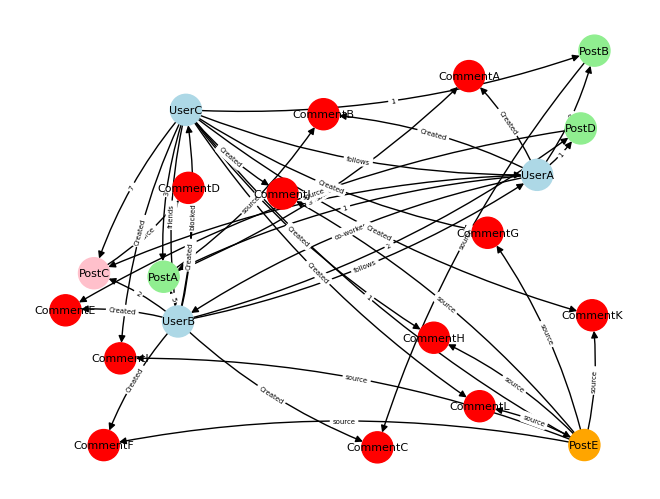

In [5]:
# Draw the graph
network_pos = nx.random_layout(network_graph)
node_colors = [network_graph.nodes[node]["color"] for node in network_graph.nodes()]
network_edge_labels = nx.get_edge_attributes(network_graph, 'weight')
nx.draw(network_graph, network_pos, node_size=500, 
        font_size=8, connectionstyle='arc3, rad = 0.1',
        node_color=node_colors, with_labels=True,
)
nx.draw_networkx_edge_labels(network_graph, network_pos,
                             edge_labels=network_edge_labels,
                             connectionstyle='arc3, rad = 0.1',
                             font_size=5,
)